In [6]:
import pandas as pd
import numpy as np
from scipy.stats import binom
from scipy.stats import poisson

import matplotlib.pyplot as plt
%matplotlib inline

## 2.1 例題：種子数の統計モデリング

In [13]:
# データの読み込み
data = pd.read_csv(r'./data.csv', header=None)

"""R
load("data.RData")
""" 

'R\nload("data.RData")\n'

In [15]:
# データの確認
print(len(data))

"""R
length(data)
"""

50


'R\nlength(data)\n'

In [18]:
# dataの要約
print(data.describe())

"""R
summary(data)
"""

              0
count  50.00000
mean    3.56000
std     1.72804
min     0.00000
25%     2.00000
50%     3.00000
75%     4.75000
max     7.00000


'R\nsummary(data)\n'

In [20]:
# 度数分布を得る
print(np.histogram(data, bins=7))

"""R
table(data)
"""

(array([ 1,  3, 11, 12, 10,  5,  8]), array([0., 1., 2., 3., 4., 5., 6., 7.]))


'R\ntable(data)\n'

'R\nhist(data, breaks = seq(-0.5, 9.5, 1))\n'

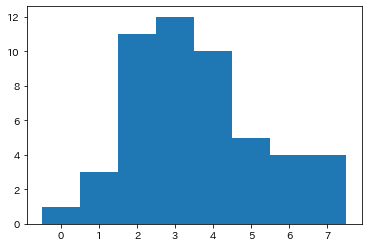

In [23]:
# ヒストグラム
plt.hist(data, bins=np.arange(-0.5, 8.5, 1))

"""R
hist(data, breaks = seq(-0.5, 9.5, 1))
"""

In [30]:
# 標本分散 と 不偏分散
print(np.var(data,ddof=0))
print(np.var(data,ddof=1))

"""R
var(data)
"""

0    2.9264
dtype: float64
0    2.986122
dtype: float64


'R\nvar(data)\n'

In [37]:
# 標本標準偏差
print(np.sqrt(data.var()))

"""R
sd(data)
sqrt(var(data))
"""

0    1.72804
dtype: float64


'R\nsd(data)\nsqrt(var(data))\n'

## 2.2 データと確率分布の対応関係を眺める

'R\ny <- 0:9\nprob <- dpois(y, lambda = 6)\nplot(y, prob, type = "b", lty = 2)\n'

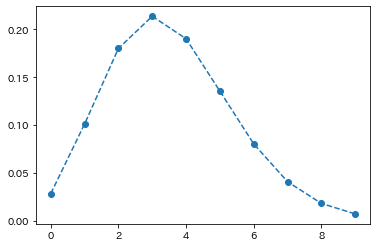

In [38]:
# 平均3.56のポアソン分布を図示してみる。
y = range(10)
prob = poisson.pmf(y, mu=3.56)
plt.plot(y, prob, "o--")

"""R
y <- 0:9
prob <- dpois(y, lambda = 6)
plot(y, prob, type = "b", lty = 2)
"""

## 2.4 ポアソン分布のパラメータの最尤推定

'R\nlogL <- function(m) sum(dpois(data, m, log=TRUE))\nlambda <- seq(2, 5, 0.1)\nplot(lambda, sapply(lambda, logL), type= "l")\n'

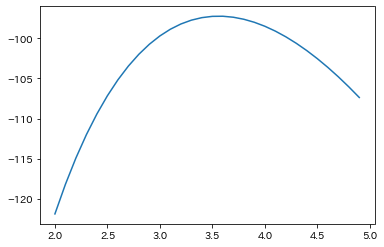

In [52]:
# 対数尤度 logL(lambda)とlambdaの関係を調べる
logL = lambda lambda_: sum(poisson.logpmf(data,mu=lambda_))
lambda_list = np.arange(2, 5, 0.1)
logL_list = [logL(lambda_) for lambda_ in lambda_list]
plt.plot(x, logL_list)

"""R
logL <- function(m) sum(dpois(data, m, log=TRUE))
lambda <- seq(2, 5, 0.1)
plot(lambda, sapply(lambda, logL), type= "l")
"""

# 参考
- https://github.com/takitsuba/midoribon/blob/master/Chap2/